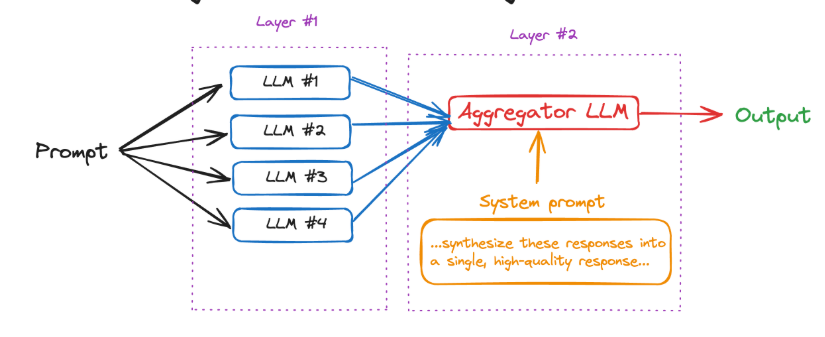

https://github.com/togethercomputer/MoA

In [ ]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install openai
!pip install gradio

# Clean up the notebook
clean_notebook()

In [19]:
%%writefile .env
OPENAI_API_KEY=your_api_key_here
OPENTYPHOON_API_KEY=api_key_here

Writing .env


In [20]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

In [21]:

# Import required libraries
import openai
from openai import OpenAI
import os

# Set up OpenAI API key
# Replace 'your-api-key' with your actual OpenAI API key
# Students: Get your API key from https://platform.openai.com/account/api-keys
api_key = 'your-api-key'  # TODO: Replace with your API key
openai_client = OpenAI(api_key=api_key)

# Define the model to use (e.g., gpt-3.5-turbo or gpt-4)
model_name = "gpt-3.5-turbo"

print("OpenAI client initialized successfully!")

OpenAI client initialized successfully!


# Step 1:Mixture-of-Agents (MoA) Using OpenAI API

This notebook demonstrates a simplified Mixture-of-Agents (MoA) system using the OpenAI API. The goal is to teach students how multiple AI agents can collaborate to produce a better response by combining their outputs.

### What is Mixture-of-Agents (MoA)?
MoA is a framework where multiple AI agents work together to solve a problem. Each agent generates a response, and a final aggregator combines these responses to produce a refined output. In this example:
- **Proposer Agents**: Generate initial responses to a user query.
- **Aggregator Agent**: Combines the proposers' responses into a final answer.


## Step 2: Define the Proposer Agent Function

The proposer agent generates an initial response to a user query based on a specific role or perspective. For example, one agent might focus on creativity, another on accuracy. We'll create a function that calls the OpenAI API with a system prompt defining the agent's role.

In [22]:
def proposer_agent(user_prompt, agent_role, model_name="gpt-3.5-turbo"):
    """
    Generates a response from an AI agent with a specific role.
    
    Parameters:
    - user_prompt (str): The user's query or question.
    - agent_role (str): The role or perspective of the agent (e.g., "Creative Writer").
    - model_name (str): The OpenAI model to use.
    
    Returns:
    - str: The agent's response.
    """
    # Define the system prompt to guide the agent's behavior
    system_prompt = f"You are a {agent_role}. Provide a detailed and relevant response to the user's query."
    
    try:
        # Call the OpenAI API
        completion = openai_client.chat.completions.create(
            model=model_name,
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": user_prompt},
            ]
        )
        # Extract and return the agent's response
        response = completion.choices[0].message.content
        return response
    except Exception as e:
        print(f"Error in proposer_agent: {e}")
        return "Error generating response."

## Step 3: Define the Aggregator Agent Function

The aggregator agent takes the responses from all proposer agents and combines them into a single, coherent response. It uses the OpenAI API to summarize and refine the inputs.

In [23]:
def aggregator_agent(proposer_responses, user_prompt, model_name="gpt-3.5-turbo"):
    """
    Combines responses from proposer agents into a single, refined response.
    
    Parameters:
    - proposer_responses (list): List of responses from proposer agents.
    - user_prompt (str): The original user query.
    - model_name (str): The OpenAI model to use.
    
    Returns:
    - str: The final aggregated response.
    """
    # Combine all proposer responses into a single string
    combined_input = "\n\n".join([f"Agent {i+1} Response:\n{resp}" for i, resp in enumerate(proposer_responses)])
    
    # Define the system prompt for the aggregator
    system_prompt = (
        "You are an expert summarizer and synthesizer. Your task is to take the following responses "
        "from multiple agents and combine them into a single, coherent, and comprehensive answer "
        "to the user's query. Ensure the response is clear, concise, and addresses the query effectively."
    )
    
    # Create the prompt for the aggregator
    aggregator_prompt = (
        f"User Query: {user_prompt}\n\n"
        f"Agent Responses:\n{combined_input}\n\n"
        "Synthesize these responses into a single answer."
    )
    
    try:
        # Call the OpenAI API
        completion = openai_client.chat.completions.create(
            model=model_name,
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": aggregator_prompt},
            ]
        )
        # Extract and return the aggregated response
        response = completion.choices[0].message.content
        return response
    except Exception as e:
        print(f"Error in aggregator_agent: {e}")
        return "Error generating aggregated response."

## Step 4: Define the Main MoA Function

The main function orchestrates the MoA process by:
1. Collecting responses from multiple proposer agents with different roles.
2. Passing those responses to the aggregator agent.
3. Returning the final response.

In [24]:
def mixture_of_agents(user_prompt, agent_roles, model_name="gpt-3.5-turbo"):
    """
    Runs the Mixture-of-Agents system to generate a final response.
    
    Parameters:
    - user_prompt (str): The user's query or question.
    - agent_roles (list): List of roles for proposer agents (e.g., ["Creative Writer", "Fact Checker"]).
    - model_name (str): The OpenAI model to use.
    
    Returns:
    - str: The final aggregated response.
    """
    print(f"Processing query: {user_prompt}")
    
    # Step 1: Collect responses from proposer agents
    proposer_responses = []
    for role in agent_roles:
        print(f"Generating response from {role}...")
        response = proposer_agent(user_prompt, role, model_name)
        proposer_responses.append(response)
    
    # Step 2: Aggregate the responses
    print("Aggregating responses...")
    final_response = aggregator_agent(proposer_responses, user_prompt, model_name)
    
    return final_response

## Step 5: Run the Mixture-of-Agents

Let's test the MoA system with a sample query and three proposer agents with different roles. We'll ask a question and see how the agents collaborate to provide a response.

In [25]:
# Define the user query
model_name = "gpt-3.5-turbo"
user_query = "What are the benefits of recycling?"

# Define the roles for proposer agents
agent_roles = [
    "Environmental Scientist",
    "Community Educator",
    "Economic Analyst"
]

# Run the Mixture-of-Agents
final_answer = mixture_of_agents(user_query, agent_roles, model_name)

# Print the results
print("\n=== Mixture-of-Agents Result ===")
print(f"User Query: {user_query}")
print("\nFinal Answer:")
print(final_answer)

Processing query: What are the benefits of recycling?
Generating response from Environmental Scientist...
Error in proposer_agent: Error code: 401 - {'error': {'message': 'Incorrect API key provided: your-api-key. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}
Generating response from Community Educator...
Error in proposer_agent: Error code: 401 - {'error': {'message': 'Incorrect API key provided: your-api-key. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}
Generating response from Economic Analyst...
Error in proposer_agent: Error code: 401 - {'error': {'message': 'Incorrect API key provided: your-api-key. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}
Aggregating respons